In [1]:
from __future__ import print_function, division
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)
#matplotlib.rcParams['axes.facecolor']='grey'

In [3]:
os.system("curl -O https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip")
os.system("mv " + "taxi_zones.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/taxi_zones.zip -d " + os.getenv("PUIDATA") + "/taxi_zones")
zone = gpd.read_file(os.getenv("PUIDATA") + "/taxi_zones" + "/taxi_zones.shp")
zone.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


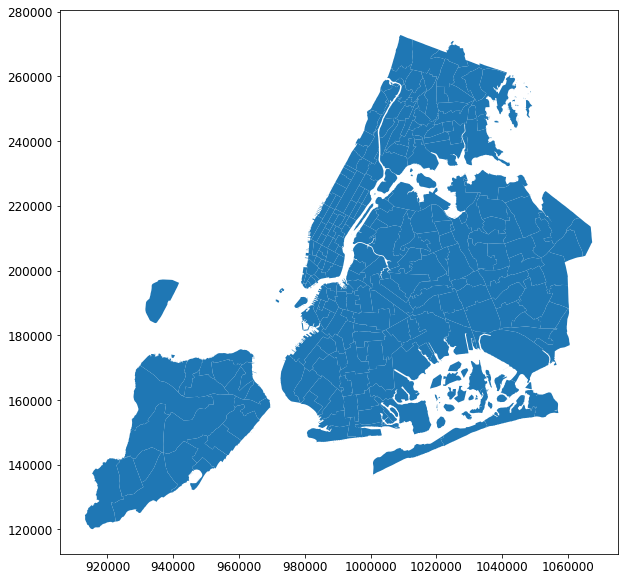

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
zone.plot(ax=ax, alpha=1)

In [5]:
zone.shape

(263, 7)

In [6]:
zone.zone.unique()

array(['Newark Airport', 'Jamaica Bay', 'Allerton/Pelham Gardens',
       'Alphabet City', 'Arden Heights', 'Arrochar/Fort Wadsworth',
       'Astoria', 'Astoria Park', 'Auburndale', 'Baisley Park',
       'Bath Beach', 'Battery Park', 'Battery Park City', 'Bay Ridge',
       'Bay Terrace/Fort Totten', 'Bayside', 'Bedford', 'Bedford Park',
       'Bellerose', 'Belmont', 'Bensonhurst East', 'Bensonhurst West',
       'Bloomfield/Emerson Hill', 'Bloomingdale', 'Boerum Hill',
       'Borough Park', 'Breezy Point/Fort Tilden/Riis Beach',
       'Briarwood/Jamaica Hills', 'Brighton Beach', 'Broad Channel',
       'Bronx Park', 'Bronxdale', 'Brooklyn Heights', 'Brooklyn Navy Yard',
       'Brownsville', 'Bushwick North', 'Bushwick South',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Central Harlem',
       'Central Harlem North', 'Central Park', 'Charleston/Tottenville',
       'Chinatown', 'City Island', 'Claremont/Bathgate', 'Clinton East',
       'Clinton Hill', 'Clinton West

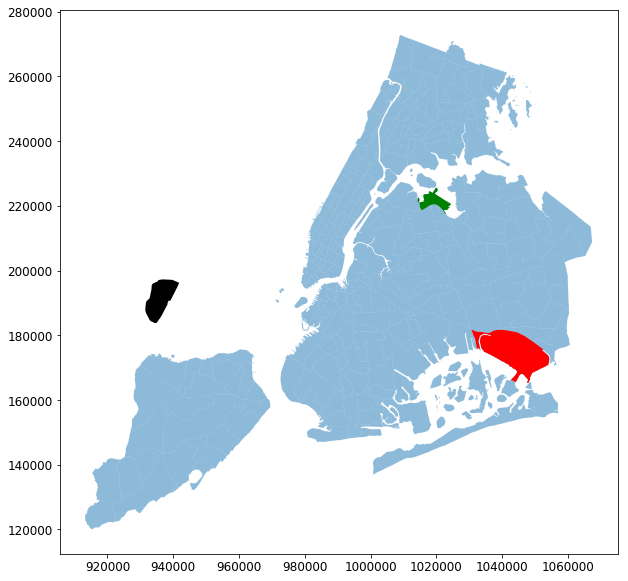

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
zone.plot(ax=ax, alpha=0.5)
zone[zone.zone == 'Newark Airport'].plot(ax=ax, color='k')
zone[zone.zone == 'JFK Airport'].plot(ax=ax, color='r')
zone[zone.zone == 'LaGuardia Airport'].plot(ax=ax, color='g')
plt.savefig('taxi_zone_nyc', dpi=500, transparent=True)
plt.show()